2(a)

First find the y-component of the velocity:
$$\frac{dv_{y}}{dt} = \frac{G M}{r^{2}} sin(\theta)$$

$$r = \sqrt{x^{2}+b^{2}}$$

$$x = v_{x} t$$

$$sin(\theta) = \frac{b}{r}$$

Substitute into the first equation and integrate from t = $-\inf$ to $\inf$:

$$\frac{dv}{dt} = \frac{G M}{(v_{x} t)^{2} + b^{2}} \frac{b}{((v_{x} t)^{2} + b^{2})^{\frac{1}{2}}}$$

$$v_{y} = \frac{2 G M}{v_{x} b}$$

use $v_{x} = c$ for a photon:

$$tan(\alpha) = \frac{v_{y}}{v_{x}} \approx \alpha$$ using the small angle formula.

Classical deflection angle:
    $$\alpha = \frac{2 G M}{c^{2} b}$$
Relativistic deflection angle:
    $$\alpha = \frac{4 G M}{c^{2} b}$$

2(b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const
import astropy.units as u


#2(b)

aClassic = 2*const.M_sun*const.G/(const.c**2*const.R_sun)
print aClassic #in radians

print aClassic*206271 

a = 4*const.M_sun*const.G/(const.c**2*const.R_sun)
print a #in radians

print a*206271

4.24735799792e-06 
0.876106781589 
8.49471599584e-06 
1.75221356318 


3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const
import astropy.units as u

#actually put derivation in here
#M = Dd*Ds/(Dds) * c^2/(4*G)*theta**2
theta = (5.35+.8)/(2*206271)
Dd = 1047.3*3.08e22*u.meter
Ds = 1768.2*3.08e22*u.meter
Dds = Ds - Dd

M = Dd*Ds/(Dds) * const.c**2/(4*const.G)*theta**2

print M

5.91967272283e+42 kg


4(a) There are many rays that would end up at the origin in the source plane. There should be rays coming from a circle with an angular radius of $\theta$, not just the one as illustrated in the image. These rays form an Einstien ring.

4(b),(c),(d)

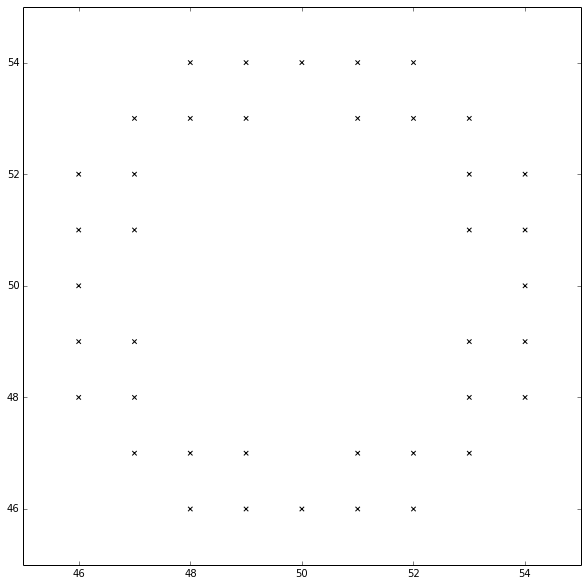

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.constants as const
import astropy.units as u
#import itertools

#beta = theta - Dds/Ds * alpha_hat
#def vectorr(I,  J):
#return itertools.product(range(K), range(J), range(I))

theta = (5.35+.8)/(2.*206271.)
Dd = 1047.3*3.08e22
Ds = 1768.2*3.08e22
Dds = Ds - Dd
M = 5.9197e42 #from question 3
G = const.G.value
c = const.c.value

#define one pixel as being 0.05 arsecs
pix = 0.05

#define distance ratio D:
D = Dds/(Ds*Dd)

#I tried numpy meshgrid but this method still runs faster

fig = plt.figure(1, figsize=(10,10))

def get_beta(xcenter, ycenter, radius, size):
    
    betaX = np.arange(size)
    betaY = np.arange(size)

    for i in np.nditer(betaX):
        for j in np.nditer(betaY):
            y = betaX[i]-xcenter
            x = betaY[j]-ycenter
    
            if(y == 0):
                by = 0
            else:
                t = np.arctan2(y, x)
                by = y*pix - 206271.*D*4.*G*M/(c**2*(x**2 + y**2)**(1./2.)*4.85e-6*pix)*np.sin(t)
        
            if(x == 0): 
                bx = 0
            else:
                t = np.arctan2(y, x)
                bx = x*pix - 206271.*D*4.*G*M/(c**2*(x**2 + y**2)**(1./2.)*4.85e-6*pix)*np.cos(t)   
        
            r = (bx**2. + by**2.)**(1./2.)
            #print r
            if((xcenter - radius) < r < (xcenter + radius)):            
                plt.scatter(j, i, marker='x', c='black')
                
    plt.show()
    
size = 100  #unable to run on jupyter with much larger than a 100 by 100 array
get_beta(size/2., size/2., 10, size)    
    

5(a)

$\tau$ is is the scattering depth of particles, also known as the optical depth and $\sigma$ is the cross section of the particle.
The surface mass density of the material $\Sigma$ is the number density times the length of the path timesthe mass of each particle.
$$\Sigma = n L m$$
Using dimensional analysis, the total area blocked by the particles will be $\frac{\sigma A \Sigma}{m}$. The scattering depth related to the fraction of the light blocked per unit area.
$$\tau = \frac{\sigma \Sigma}{m}$$

5(b)

The scattering depth of the particles approches zero because the particles do not scatter at a detectable level. Therefore $\frac{\sigma}{m}$ is very small, meaning that dark matter has a very large mass relative to the size of the particles.  